<a href="https://colab.research.google.com/github/aisyahaini/MachineLearning/blob/main/Missing_Value_Aisyah_Nuraini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import Library


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, r2_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE


import plotly.graph_objs as go
import plotly.offline as py

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from scipy import stats
from scipy.stats.mstats import winsorize

import missingno as msno

In [ ]:
df_missing0 = pd.read_csv('/content/missing-value.csv')

df_missing = df_missing0.copy()

In [ ]:
df_missing

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2/26/2015,Quarter4,sweing,Thursday,7,0.80,30.10,694,4080,50,0,0,1,59,800808642
1,2/26/2015,Quarter4,sweing,Thursday,11,0.80,11.61,816,2820,50,0,0,2,57,800516667
2,2/26/2015,Quarter4,sweing,Thursday,12,0.80,15.26,1065,4080,63,0,0,0,34,800401961
3,2/26/2015,Quarter4,finishing,Thursday,1,0.50,3.94,0,3360,0,0,0,"0,0","8,0",768847222
4,2/26/2015,Quarter4,sweing,Thursday,6,0.75,18.79,912,3960,45,0,0,"0,0","33,0",75065101
5,2/26/2015,Quarter4,sweing,Thursday,3,0.75,29.40,1244,6840,45,0,0,"2,0","57,0",750473684
6,2/26/2015,Quarter4,sweing,Thursday,9,0.75,18.79,1020,5640,45,0,0,"1,0","52,0",750371895
7,2/26/2015,Quarter4,sweing,Thursday,8,0.75,29.40,916,6960,56,0,0,"2,0","58,0",750206897
8,2/26/2015,Quarter4,sweing,Thursday,10,0.70,21.82,1591,3240,0,0,0,"1,0","52,0",700251773
9,2/26/2015,Quarter4,sweing,Thursday,2,0.70,30.33,398,6960,0,0,0,"1,0","58,0",66237931


In [ ]:
df_missing.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2/26/2015,Quarter4,sweing,Thursday,7,0.80,30.10,694,4080,50,0,0,1,59,800808642
1,2/26/2015,Quarter4,sweing,Thursday,11,0.80,11.61,816,2820,50,0,0,2,57,800516667
2,2/26/2015,Quarter4,sweing,Thursday,12,0.80,15.26,1065,4080,63,0,0,0,34,800401961
3,2/26/2015,Quarter4,finishing,Thursday,1,0.50,3.94,0,3360,0,0,0,"0,0","8,0",768847222
4,2/26/2015,Quarter4,sweing,Thursday,6,0.75,18.79,912,3960,45,0,0,"0,0","33,0",75065101


In [ ]:
df_missing[['wip']] = df_missing[['wip']].replace(0,np.NaN)
df_missing.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2/26/2015,Quarter4,sweing,Thursday,7,0.80,30.10,694.0,4080,50,0,0,1,59,800808642
1,2/26/2015,Quarter4,sweing,Thursday,11,0.80,11.61,816.0,2820,50,0,0,2,57,800516667
2,2/26/2015,Quarter4,sweing,Thursday,12,0.80,15.26,1065.0,4080,63,0,0,0,34,800401961
3,2/26/2015,Quarter4,finishing,Thursday,1,0.50,3.94,NaN,3360,0,0,0,"0,0","8,0",768847222
4,2/26/2015,Quarter4,sweing,Thursday,6,0.75,18.79,912.0,3960,45,0,0,"0,0","33,0",75065101


<Axes: >

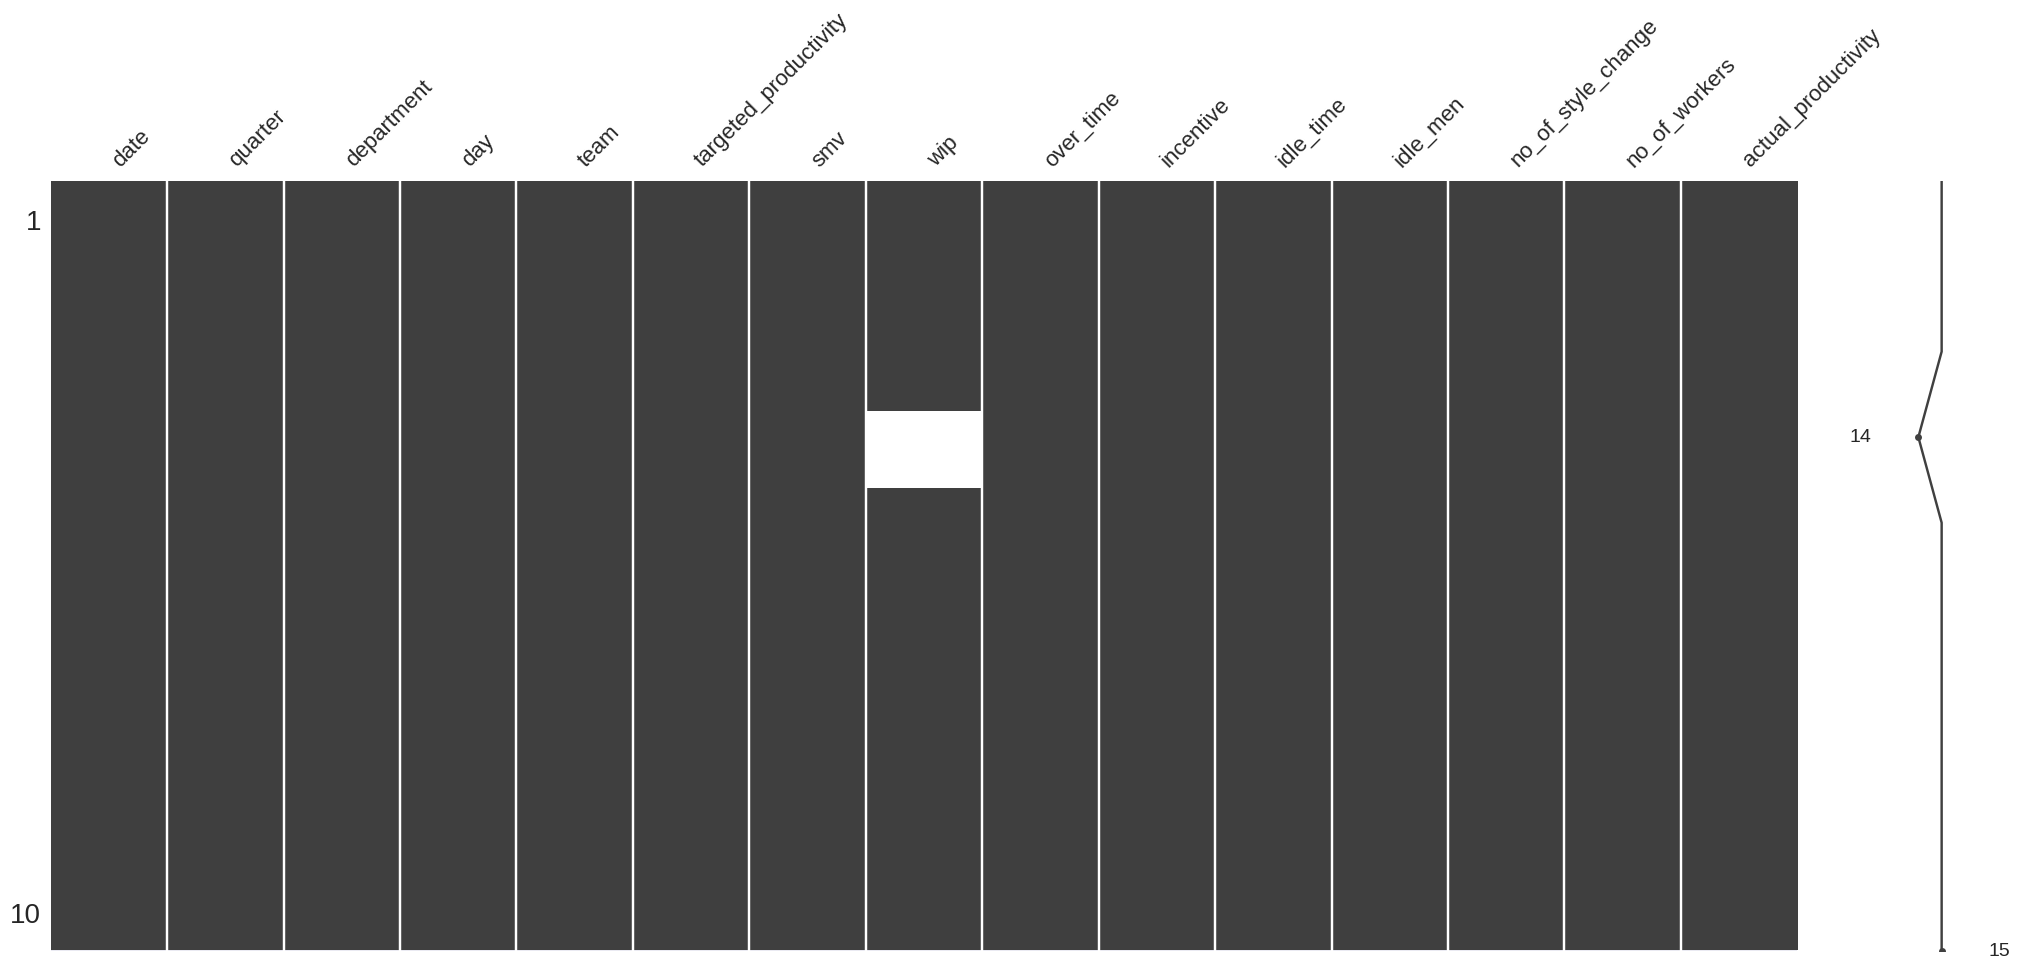

In [ ]:
df_missing.rename(columns ={"MissingPedigreeFunction":"MPF"},inplace=True)
msno.matrix(df_missing)

Mean Imputation

In [ ]:
df_dbmean = df_missing.copy()
round(df_dbmean['wip'].mean(), 2)

961.78

In [ ]:
mean_imputer = SimpleImputer(missing_values = np.nan,strategy ='mean')
df_dbmean['wip'] = mean_imputer.fit_transform(
    df_dbmean['wip'].values.reshape(-1,1))

<ipython-input-38-e0f23d4732b2>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



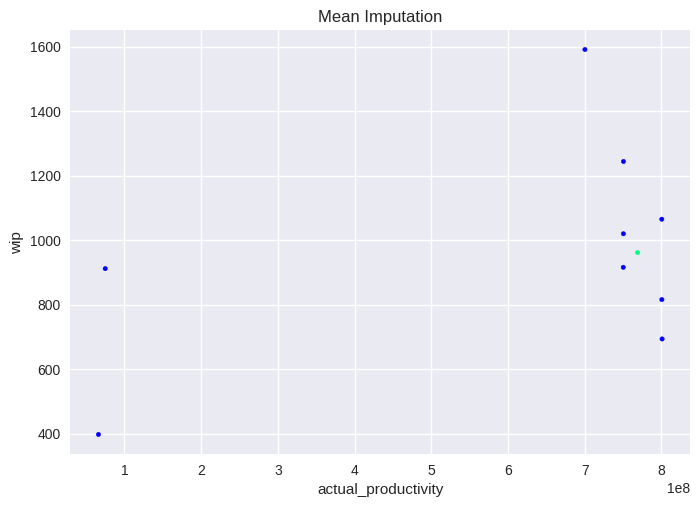

In [ ]:
plt.style.use('seaborn')
fig = plt.Figure()
null_values = df_missing['wip'].isnull()
fig = df_dbmean.plot(x="actual_productivity", y='wip', kind='scatter',
                     c=null_values, cmap='winter',s = 10,
                     title='Mean Imputation', colorbar=False)

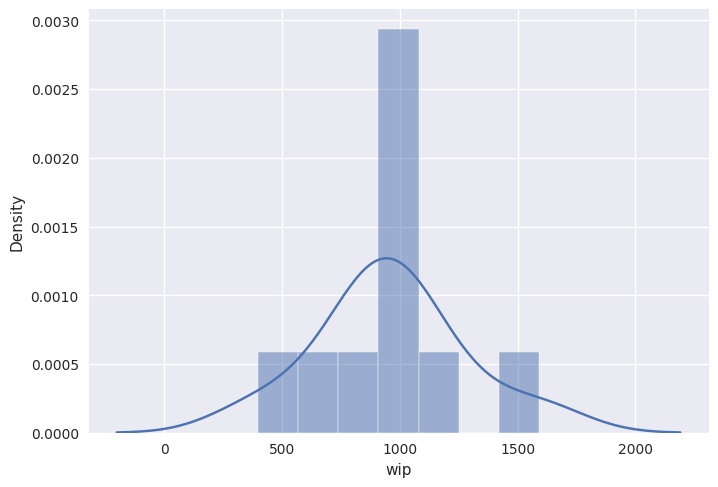

In [ ]:
sns.histplot(
    df_dbmean["wip"], kde=True,
    stat="density", kde_kws=dict(cut=3)
)
sns.set_style("darkgrid")

Median Imputation

In [ ]:
df_dbmedian = df_missing.copy()
round(df_dbmedian['wip'].median(), 2)

916.0

In [ ]:
median_imputer = SimpleImputer(missing_values = np.nan,
                        strategy ='median')
df_dbmedian['wip'] = median_imputer.fit_transform(
    df_dbmedian['wip'].values.reshape(-1,1))

<ipython-input-42-3bbb6d10b7b7>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



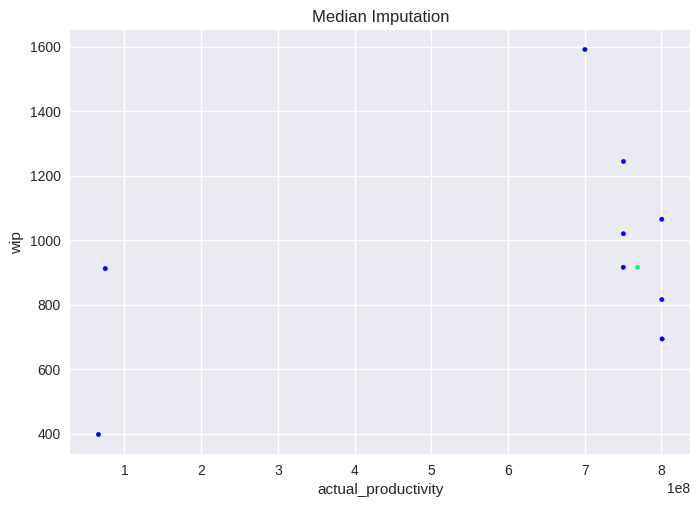

In [ ]:
plt.style.use('seaborn')
fig = plt.Figure()
null_values = df_missing['wip'].isnull()
fig = df_dbmedian.plot(x="actual_productivity", y='wip', kind='scatter',
                     c=null_values, cmap='winter',s = 10,
                     title='Median Imputation', colorbar=False)

KNN Imputation

In [ ]:
df_dbknn = df_missing.copy()
df_dbknn = df_dbknn.filter(['team','targeted_productivity','smv', 'wip', 'over_time', 'actual_productivity'], axis=1).copy()
df_dbknn.head()

,team,targeted_productivity,smv,wip,over_time,actual_productivity
0,7,0.80,30.10,694.0,4080,800808642
1,11,0.80,11.61,816.0,2820,800516667
2,12,0.80,15.26,1065.0,4080,800401961
3,1,0.50,3.94,NaN,3360,768847222
4,6,0.75,18.79,912.0,3960,75065101


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
df_dbknn = pd.DataFrame(scaler.fit_transform(df_dbknn), columns = df_dbknn.columns)

# Define KNN imputer and fill missing values
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_dbknn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_dbknn), columns=df_dbknn.columns)

df_dbknn_imputed.head()

,team,targeted_productivity,smv,wip,over_time,actual_productivity
0,0.545455,1.000000,0.991285,0.248114,0.304348,1.000000
1,0.909091,1.000000,0.290640,0.350377,0.000000,0.999603
2,1.000000,1.000000,0.428950,0.559095,0.304348,0.999446
3,0.000000,0.000000,0.000000,0.572339,0.130435,0.956490
4,0.454545,0.833333,0.562713,0.430847,0.275362,0.012017


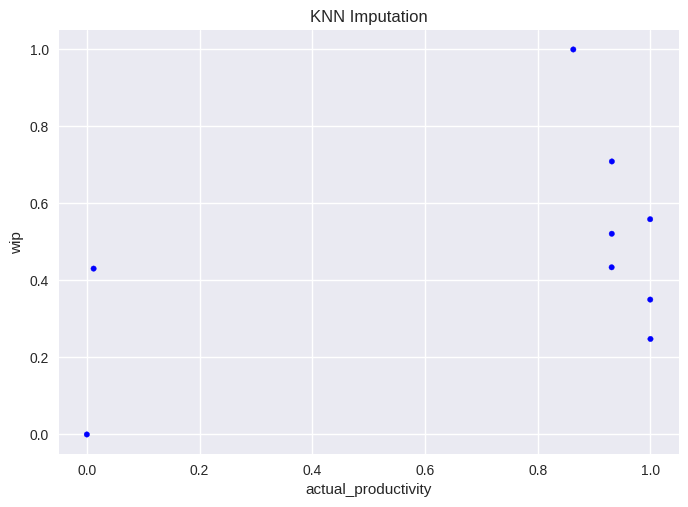

In [ ]:
fig = plt.Figure()
null_values = df_missing['wip'].isnull()
fig = df_dbknn.plot(x='actual_productivity', y='wip', kind='scatter',
                          c=null_values, cmap='winter', s = 15,
                          title='KNN Imputation', colorbar=False)